# Issue 604 - Question about ERT inversion result

The full issue can be found on https://github.com/gimli-org/gimli/issues/604

In [3]:
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

Data: Sensors: 56 data: 1943, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x250300a6970>)

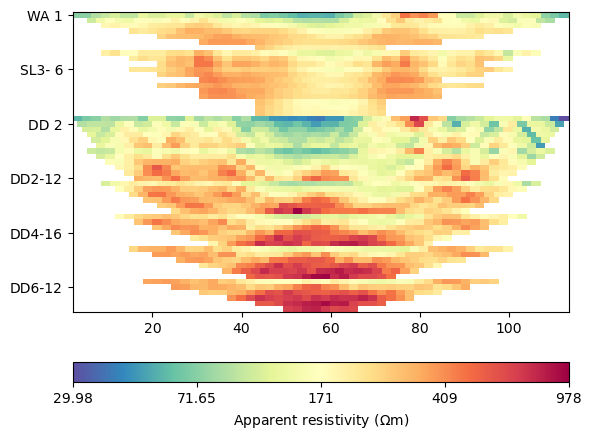

In [4]:
data = ert.load("NWG-1M.txt")
print(data)
data.show()

array([[ -4.  ,   0.  ,   0.  ],
       [ -4.  , -44.  ,   0.  ],
       [114.  , -21.95,   0.  ],
       [114.  ,  22.05,   0.  ],
       [-59.  ,   0.  ,   0.  ],
       [-59.  , -99.  ,   0.  ],
       [169.  ,  22.05,   0.  ],
       [169.  , -76.95,   0.  ],
       [  0.  ,   0.  ,   0.  ],
       [  1.  ,   0.  ,   0.  ]])

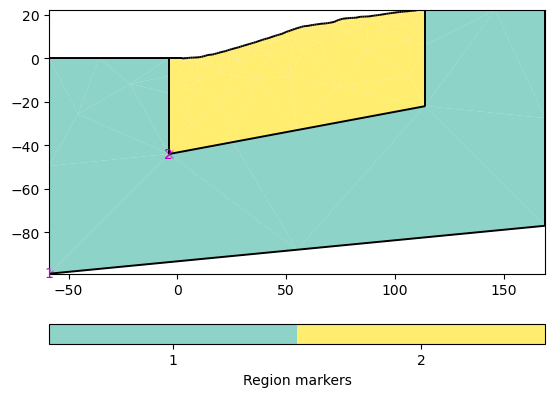

In [29]:
plc = mt.createParaMeshPLC(data, boundary=0.5, balanceDepth=False)
pg.show(plc)
plc.positions().array()[:10]

(<Axes: >, None)

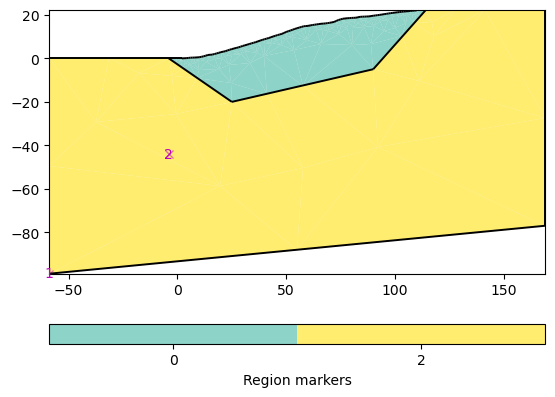

In [18]:
plc.node(1).setPos([25, -20])
plc.node(2).setPos([90, -5])
pg.show(plc)

In [23]:
plc.regionMarker(2).setPos([50, 0])

In [24]:
mesh = mt.createMesh(plc, quality=34)
data.estimateError(absoluteUError=5e-5, relativeError=0.03)
mgr = ert.Manager(data)
mgr.invert(mesh=mesh, verbose=1)

19/10/23 - 15:50:25 - pyGIMLi - INFO - Found 2 regions.
19/10/23 - 15:50:25 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
19/10/23 - 15:50:25 - pyGIMLi - INFO - Creating forward mesh from region infos.
19/10/23 - 15:50:25 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
19/10/23 - 15:50:25 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3152 Cells: 6004 Boundaries: 4652
19/10/23 - 15:50:25 - pyGIMLi - INFO - Use median(data values)=230.5763
19/10/23 - 15:50:25 - pyGIMLi - INFO - Created startmodel from forward operator: 1059, min/max=230.576300/230.576300


1059 [95.20699108122625,...,357.2664530011975]

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x25056d697f0>)

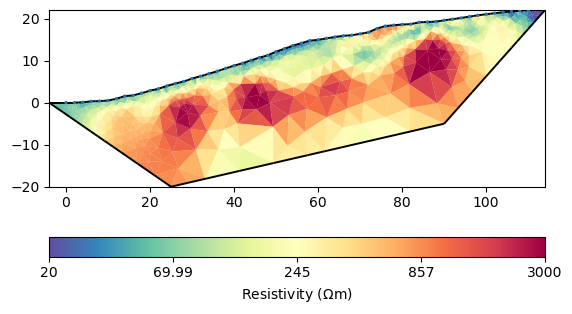

In [27]:
mgr.showResult(cMin=20, cMax=3000, coverage=1)